In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map

from rlforge.agents.tabular import SarsaAgent, QAgent, ExpectedSarsaAgent
from rlforge.environments import DynaMaze, ShortcutMaze
from rlforge.experiments import runEpisodicExperiment

In [2]:
env = DynaMaze()
expected_sarsa_agent = ExpectedSarsaAgent(step_size=0.5,
                                          discount=0.95,
                                          num_states=env.observation_space.n,
                                          num_actions=env.action_space.n,
                                          epsilon=0.1)
dyna_q_agent = QAgent(step_size=0.5,
                      discount=0.95,
                      num_states=env.observation_space.n,
                      num_actions=env.action_space.n,
                      epsilon=0.1,
                      planning=True,
                      planning_steps=10,
                      exploration_bonus=0)
dyna_q_plus_agent = QAgent(step_size=0.5,
                           discount=0.95,
                           num_states=env.observation_space.n,
                           num_actions=env.action_space.n,
                           epsilon=0.1,
                           planning=True,
                           planning_steps=10,
                           exploration_bonus=0.001)

In [5]:
algorithms = ["Expected SARSA", "DynaQ", "DynaQ+"]
agents = [expected_sarsa_agent, dyna_q_agent, dyna_q_plus_agent]

rewards_list = []
steps_per_episode_list = []

for agent in agents:

    rewards, steps_per_episode = runEpisodicExperiment(env, agent, 30, 50, 10000)

    rewards_list.append(rewards)
    steps_per_episode_list.append(steps_per_episode)

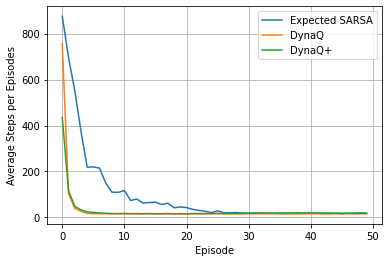

In [6]:
for idx, algo_steps in enumerate(steps_per_episode_list):

  plt.plot(np.mean(algo_steps, axis=1), label = algorithms[idx])

plt.xlabel("Episode")
plt.ylabel("Average Steps per Episodes")
plt.legend()
plt.grid()

In [5]:
env = ShortcutMaze(shortcut_episodes=20)
dyna_q_agent = QAgent(step_size=0.5,
                      discount=0.95,
                      num_states=env.observation_space.n,
                      num_actions=env.action_space.n,
                      epsilon=0.1,
                      planning=True,
                      planning_steps=10,
                      exploration_bonus=0)
dyna_q_plus_agent = QAgent(step_size=0.5,
                           discount=0.95,
                           num_states=env.observation_space.n,
                           num_actions=env.action_space.n,
                           epsilon=0.1,
                           planning=True,
                           planning_steps=10,
                           exploration_bonus=0.001)

In [6]:
algorithms = ["DynaQ", "DynaQ+"]
agents = [dyna_q_agent, dyna_q_plus_agent]

rewards_list = []
steps_per_episode_list = []

for agent in agents:

    rewards, steps_per_episode = runEpisodicExperiment(env, agent, 30, 50, 10000)

    rewards_list.append(rewards)
    steps_per_episode_list.append(steps_per_episode)

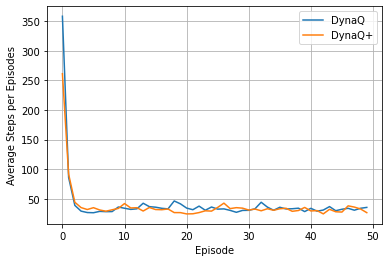

In [7]:
for idx, algo_steps in enumerate(steps_per_episode_list):

  plt.plot(np.mean(algo_steps, axis=1), label = algorithms[idx])

plt.xlabel("Episode")
plt.ylabel("Average Steps per Episodes")
plt.legend()
plt.grid()